In [45]:
# importing necessary libraries
import numpy as np
from tqdm import tqdm
from PIL import Image as img
import os as os
from sklearn.model_selection import train_test_split
from keras import models, layers, metrics, utils
from sklearn.metrics import classification_report
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [2]:
# loading images from target directory, changing their format to numpy array, and arranging them into a list object
# moreover, data augmentation is performed via 90 degree rotation in order to receive a balanced dataset
path = 'Hand_Picked_Acne_Rosacea_Keratosis"
images = os.listdir(path)
img_list = []
label_list = []
i = 0
j = 0
for image in tqdm(images):
    if 'acne' in image.lower():
        img_list.append(np.asarray(img.open(os.path.join(path,image)).resize((256,256)))) 
        label_list.append([1,0,0])
    elif 'rosacea' in image.lower():
        img_list.append(np.asarray(img.open(os.path.join(path,image)).resize((256,256))))
        label_list.append([0,1,0])
        if i < 65:
            img_list.append(np.rot90(np.asarray(img.open(os.path.join(path,image)).resize((256,256)))))
            label_list.append([0,1,0])
            i += 1
    else:
        img_list.append(np.asarray(img.open(os.path.join(path,image)).resize((256,256))))
        label_list.append([0,0,1])
        if j < 100:
            img_list.append(np.rot90(np.asarray(img.open(os.path.join(path,image)).resize((256,256)))))
            label_list.append([0,0,1])
            j += 1

100%|████████████████████████████████████████████████████████████████████████████████| 587/587 [00:16<00:00, 36.15it/s]


In [3]:
# changing the data list into a numpy array, thus finishing preprocessing
# dividing the dataset into training and testing subsets
img_arr = np.array(img_list)
label_arr = np.array(label_list)
X_train, X_test, y_train, y_test = train_test_split(img_arr, label_arr, test_size=0.1)

In [26]:
# creating and compiling a deep CNN with empirically chosen hyperparameters (various attempts in a different file)
# after getting access to higher computational power, gridsearch will be performed
network_1 = models.Sequential()
network_1.add(layers.Conv2D(32, (5,5), activation='swish', input_shape=(256,256,3), padding='same', kernel_initializer='random_normal'))
network_1.add(layers.MaxPooling2D())
network_1.add(layers.Conv2D(64, (3,3), activation='swish', padding='same', kernel_initializer='random_normal'))
network_1.add(layers.MaxPooling2D())
network_1.add(layers.Conv2D(128, (3,3), activation='swish', padding='same', kernel_initializer='random_normal'))
network_1.add(layers.MaxPooling2D())
network_1.add(layers.Flatten())
network_1.add(layers.Dense(64, activation='swish', kernel_initializer='random_normal'))
network_1.add(layers.Dense(3, activation='softmax', kernel_initializer='random_normal'))

network_1.compile(optimizer='adam', loss='categorical_crossentropy', 
                metrics=['categorical_accuracy', metrics.Recall(), 
                         metrics.Precision()])

In [27]:
# glimpsing the compiled model
network_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 128)     

In [28]:
# training the network on the dedicated data subset and storing the process' history in a variable
history_1 = network_1.fit(X_train, y_train, epochs=12)

Epoch 1/12
22/22 [==============================] - 59s 3s/step - loss: 126.7536 - categorical_accuracy: 0.3491 - recall_6: 0.3491 - precision_6: 0.3491
Epoch 2/12
22/22 [==============================] - 63s 3s/step - loss: 1.5544 - categorical_accuracy: 0.3950 - recall_6: 0.3225 - precision_6: 0.3949
Epoch 3/12
22/22 [==============================] - 60s 3s/step - loss: 1.0026 - categorical_accuracy: 0.5710 - recall_6: 0.4615 - precision_6: 0.6058
Epoch 4/12
22/22 [==============================] - 62s 3s/step - loss: 0.7464 - categorical_accuracy: 0.6716 - recall_6: 0.5784 - precision_6: 0.7448
Epoch 5/12
22/22 [==============================] - 67s 3s/step - loss: 0.7324 - categorical_accuracy: 0.6657 - recall_6: 0.6050 - precision_6: 0.7252
Epoch 6/12
22/22 [==============================] - 66s 3s/step - loss: 0.5826 - categorical_accuracy: 0.7751 - recall_6: 0.6820 - precision_6: 0.8306
Epoch 7/12
22/22 [==============================] - 59s 3s/step - loss: 0.4499 - categorical

In [29]:
# preliminary evaluation of the network based on performance metrics specified during model creation (accuracy, precision, recall)
# to that end, the testing data subset is used
network_1.evaluate(X_test, y_test)

3/3 [==============================] - 9s 962ms/step - loss: 1.1872 - categorical_accuracy: 0.6316 - recall_6: 0.6184 - precision_6: 0.6812


[1.1871718168258667,
 0.6315789222717285,
 0.6184210777282715,
 0.6811594367027283]

In [30]:
# final evaluation with additional data wrangling performed in order to utilize sklearn classification report
y_pred_1 = network_1.predict(X_test)
y_pred_one_hot_1 = []
for lst in y_pred_1:
    lst_2 = []
    for element in lst:
        if element == max(lst):
            lst_2.append(1)
        else:
            lst_2.append(0)
    y_pred_one_hot_1.append(lst_2)
y_pred_one_hot_1 = np.asarray(y_pred_one_hot_1)

3/3 [==============================] - 3s 540ms/step


In [31]:
# printing the report
report_1 = classification_report(y_test, y_pred_one_hot_1)
print(report_1)

              precision    recall  f1-score   support

           0       0.58      0.88      0.70        25
           1       0.73      0.36      0.48        22
           2       0.67      0.62      0.64        29

   micro avg       0.63      0.63      0.63        76
   macro avg       0.66      0.62      0.61        76
weighted avg       0.66      0.63      0.62        76
 samples avg       0.63      0.63      0.63        76



*Note:* 
As mentioned earlier, the model is yet to be improved. The dataset is going to be extended & modified, while the hyperparameters will be tuned via gridsearch. Below, a visual analysis of the network's activations is performed with Grad-CAM. This part is important for the research, as it highlights the importance of 'untangling' the ML black boxes.

In [32]:
# setting keras backend to tensorflow
os.environ["KERAS_BACKEND"] = "tensorflow"

In [35]:
# loading correctly classified example images
ex_acne = img.open(r"Hand_Picked_Acne_Rosacea_Keratosis\acne-closed-comedo-20.jpg").resize((256,256))
ex_keratosis = img.open(r"Hand_Picked_Acne_Rosacea_Keratosis\actinic-keratosis-5FU-21.jpg").resize((256,256))
ex_rosacea = img.open(r"Hand_Picked_Acne_Rosacea_Keratosis\rosacea-granulomatous-1.jpg").resize((256,256))

In [34]:
# function creating a Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [48]:
# function for Grad-CAM display
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    
    img = utils.load_img(img_path)
    img = utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = mpl.colormaps["jet"]

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = utils.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = utils.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)

    display(Image(cam_path))

In [50]:
# changing the format to numpy array
ex_acne_arr = np.expand_dims(np.asarray(ex_acne), axis=0)
ex_keratosis_arr = np.expand_dims(np.asarray(ex_keratosis), axis=0)
ex_rosacea_arr = np.expand_dims(np.asarray(ex_rosacea), axis=0)

In [53]:
# checking for correctness of predictions
network_1.predict(ex_acne_arr)

1/1 [==============================] - 0s 94ms/step


array([[9.5432270e-01, 4.5291282e-02, 3.8597244e-04]], dtype=float32)

In [56]:
# checking for correctness of predictions
network_1.predict(ex_keratosis_arr)

1/1 [==============================] - 0s 80ms/step


array([[1.2549462e-03, 5.1186198e-05, 9.9869388e-01]], dtype=float32)

In [57]:
# checking for correctness of predictions
network_1.predict(ex_rosacea_arr)

1/1 [==============================] - 0s 85ms/step


array([[0.00317305, 0.99575186, 0.00107511]], dtype=float32)

In [60]:
# creating heatmaps of last convolutional layer's activations
heatmap_1 = make_gradcam_heatmap(ex_keratosis_arr, network_1, 'conv2d_20')
heatmap_2 = make_gradcam_heatmap(ex_rosacea_arr, network_1, 'conv2d_20')
heatmap_3 = make_gradcam_heatmap(ex_acne_arr, network_1, 'conv2d_20')

Below images show the issue with the model. Though previous iterations yielded better performance, the trend remained the same. Namely, the model tends to focus on edges and unaffected areas rather than skin liasons. 

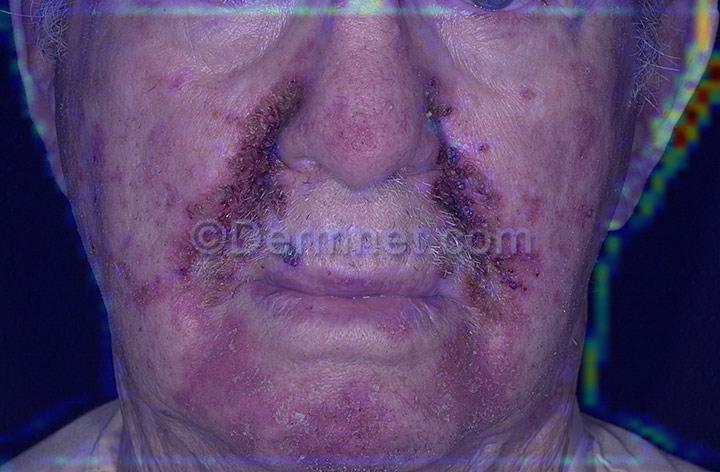

In [49]:
save_and_display_gradcam(r"Hand_Picked_Acne_Rosacea_Keratosis\actinic-keratosis-5FU-21.jpg", heatmap_1)

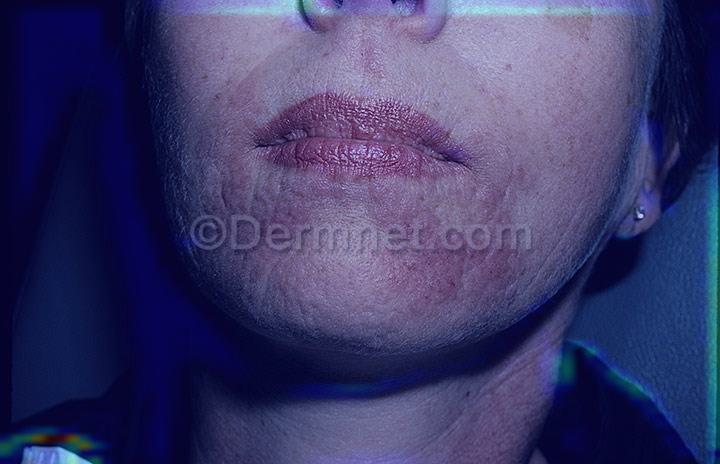

In [61]:
save_and_display_gradcam(r"Hand_Picked_Acne_Rosacea_Keratosis\rosacea-granulomatous-1.jpg", heatmap_2)

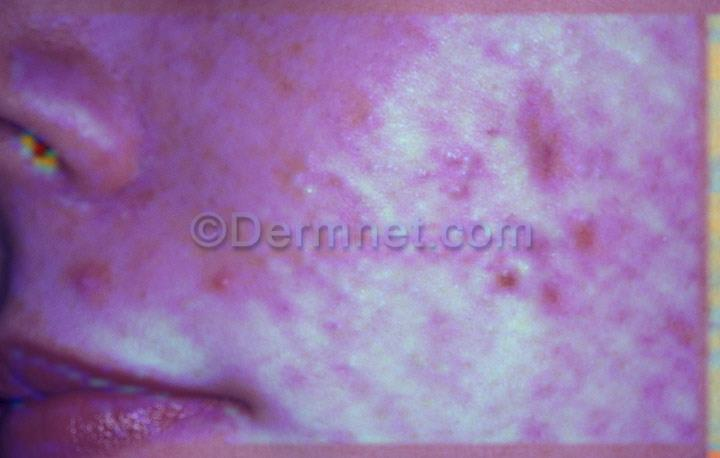

In [62]:
save_and_display_gradcam(r"Hand_Picked_Acne_Rosacea_Keratosis\acne-closed-comedo-20.jpg", heatmap_3)